In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("dataset_corridor_30")
df['MEAN_SPACINGS_2'] = np.zeros(len(df))
mean_spacing_again = []
for i, r in df.iterrows():
    accum = 0
    knns = r['KNN_RELATIVE_POSITIONS']
    for j in range(0,len(knns),2):
        accum += np.linalg.norm(np.array(knns[j], knns[j+1]))
    mean_spacing_again.append(accum / len(knns))

In [3]:
df['MEAN_SPACINGS_2'] = mean_spacing_again
df

,SPEED,MEAN_SPACING,KNN_RELATIVE_POSITIONS,MEAN_SPACINGS_2
752,0.976187,5.698636,"[0.562466, 0.6647799999999995, 0.708253, 1.420...",0.404841
753,0.988093,5.69041,"[0.5622, 0.6841800000000005, 0.746570000000000...",0.420918
754,1.010181,5.681211,"[0.5727180000000001, 0.6986500000000007, 0.783...",0.438265
755,0.997903,5.674287,"[0.59061, 0.7074099999999994, 0.82171299999999...",0.456759
756,0.969367,5.66749,"[0.6122000000000001, 0.7138900000000001, 0.851...",0.477355
...,...,...,...,...
16020,1.130555,4.243732,"[-0.25951, 0.6778199999999996, 1.176187, 1.435...",0.467666
16021,1.259014,5.00114,"[1.199493, 1.4273100000000003, 0.575144, 2.253...",0.544402
16022,1.235355,5.010149,"[1.233796, 1.427130000000001, 0.61452600000000...",0.569530
16023,1.144816,5.016434,"[1.26939, 1.4213700000000005, 0.658093, 2.2676...",0.596030


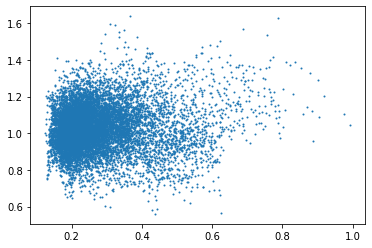

In [4]:
speeds = df['SPEED'].to_numpy()
plt.scatter(mean_spacing_again, speeds, s=1)

# DIFFERENT ROUTE..

In [5]:
def _create_num_neighbours_df(data: pd.DataFrame, neighbour_num: int = 10) -> pd.DataFrame:
    """
    filter frames from dataframe where there are not enough neighbours
    :param data: dataframe
    :param neighbour_num: number of neighbours required in each frame
    :return: filtered dataframe
    """
    frames = data['FRAME'].unique()
    frames_to_delete = []
    for frame in frames:
        if len(data[data['FRAME'] == frame]) < (neighbour_num + 1):  # has to take into account also the pedestrian itself
            frames_to_delete.append(frame)
    df = data[~data['FRAME'].isin(frames_to_delete)]
    return df

In [6]:
df_2 = pd.read_pickle("corridor_30_extended.pickle")
df_2 = _create_num_neighbours_df(df_2)


In [15]:
df_2[df_2['FRAME'] == 800]

,ID,FRAME,X,Y,OTHERS_POSITIONS,SPEED
6435,37,800,0.061577,-4.469980,"[[1.12367, -3.1629500000000004, 1.684152045355...",0.992480
6584,38,800,0.514492,-2.841170,"[[1.12367, -3.1629500000000004, 0.688941364764...",0.949670
6738,39,800,1.277620,-1.366270,"[[0.492647, -0.987395, 0.8716242747617805], [1...",0.977245
6919,40,800,0.492647,-0.987395,"[[1.27762, -1.36627, 0.8716242747617805], [0.4...",0.845859
7088,41,800,1.390050,0.033854,"[[0.42109, 0.309395, 1.0073760965112535], [0.4...",0.922210
7266,42,800,0.421090,0.309395,"[[1.39005, 0.0338535, 1.0073760965112535], [0....",0.922948
7420,43,800,1.123310,1.718980,"[[0.654466, 1.85476, 0.48810952125112256], [1....",1.011034
7599,44,800,0.654466,1.854760,"[[1.12331, 1.71898, 0.48810952125112256], [0.3...",0.877887
7761,45,800,1.118190,3.252970,"[[0.334736, 3.08176, 0.8019432861593145], [0.6...",1.106147
7936,46,800,0.334736,3.081760,"[[1.11819, 3.2529700000000004, 0.8019432861593...",1.024269


In [24]:
reference_ped = 37
dists = [el[2] for el in df_2[(df_2['FRAME'] == 800) & (df_2['ID'] == reference_ped)]['OTHERS_POSITIONS']]
np.mean(dists)

1.0815943235149146

In [48]:
import math
ref_x, ref_y = float(df_2[(df_2['FRAME'] == 800) & (df_2['ID'] == reference_ped)]['X']), float(df_2[(df_2['FRAME'] == 800) & (df_2['ID'] == reference_ped)]['Y'])
delta_x = []
delta_y = []
for i, r in  df_2[(df_2['FRAME'] == 800)].iterrows():
    if r['ID'] != 37:
        delta_x.append(r['X'] - ref_x)
        delta_y.append(r['Y'] - ref_y)
accum = 0
for x, y in zip(delta_x, delta_y):
    accum += math.sqrt(x**2 + y**2)
accum /= len(delta_x)
accum

5.527376342736993

## STARTING FROM SCRATCH